# IMDB Movie Data Analysis

IMDB is one of the most popular movie rating site. Using IMDB data from Kaggle, my aim to to explore the different factors on which its revenue is dependent. Does the bidget play a major role? Does some genres are more hit than others? Does casting count...and so on. For the purpose of analysis, I have used dataset from Kaggle

In [1]:
# importing all necessary libraries

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns #for visualization

import matplotlib.pyplot as plt #for visualization

In [2]:
df=pd.read_csv('movie_metadata.csv')

In [3]:
df.head(50)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
df.shape

(5043, 28)

In [6]:
missing_val=(df.isnull().sum()/len(df))*100

missing_val

color                         0.376760
director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
facenumber_in_poster          0.257783
plot_keywords                 3.033908
movie_imdb_link               0.000000
num_user_for_reviews          0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
imdb_score               

* We can see that gross and budget columns have the highest amount of null values. If we drop the null the values, it might affect the the analysis. 

In [7]:
# values in columns such as actor_1_facebook_likes and actor_3_facebook_likes must be included in column cast_total_facebook_likes, so, we will drop them
df.drop(['actor_1_facebook_likes','actor_3_facebook_likes'], inplace=True,axis=1)


In [8]:
# Also, Duration and movie_imdb_link column also seem redundant in this analysis
df.drop(['duration','movie_imdb_link'], inplace=True,axis=1)

In [9]:
df.duplicated().any()

True

In [10]:
# removing duplicates values
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(4998, 24)

# 1. Top 10 movies in terms of profit

In [12]:
# making these columns more readable by converting them in million $
df['gross']=df['gross'].floordiv(1000000)
df['budget']=df['budget'].floordiv(1000000)

In [13]:
df['profit']=df['gross']-df['budget']

In [14]:
df.head(10)

,color,director_name,num_critic_for_reviews,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,0.0,Joel David Moore,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,...,English,USA,PG-13,237.0,2009.0,936.0,7.9,1.78,33000,523.0
1,Color,Gore Verbinski,302.0,563.0,Orlando Bloom,309.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,English,USA,PG-13,300.0,2007.0,5000.0,7.1,2.35,0,9.0
2,Color,Sam Mendes,602.0,0.0,Rory Kinnear,200.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,...,English,UK,PG-13,245.0,2015.0,393.0,6.8,2.35,85000,-45.0
3,Color,Christopher Nolan,813.0,22000.0,Christian Bale,448.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,...,English,USA,PG-13,250.0,2012.0,23000.0,8.5,2.35,164000,198.0
4,NaN,Doug Walker,NaN,131.0,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN
5,Color,Andrew Stanton,462.0,475.0,Samantha Morton,73.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,...,English,USA,PG-13,263.0,2012.0,632.0,6.6,2.35,24000,-190.0
6,Color,Sam Raimi,392.0,0.0,James Franco,336.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,...,English,USA,PG-13,258.0,2007.0,11000.0,6.2,2.35,0,78.0
7,Color,Nathan Greno,324.0,15.0,Donna Murphy,200.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,...,English,USA,PG,260.0,2010.0,553.0,7.8,1.85,29000,-60.0
8,Color,Joss Whedon,635.0,0.0,Robert Downey Jr.,458.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,...,English,USA,PG-13,250.0,2015.0,21000.0,7.5,2.35,118000,208.0
9,Color,David Yates,375.0,282.0,Daniel Radcliffe,301.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,...,English,UK,PG,250.0,2009.0,11000.0,7.5,2.35,10000,51.0


In [61]:
df['genre_1'] = df['genres'].apply(lambda x: x.split('|')[0])
df['genre_2'] = df['genres'].apply(lambda x: x.split('|')[1] if len(x.split('|'))>1 else x)
df['genre_3'] = df['genres'].apply(lambda x: x.split('|')[2] if len(x.split('|'))>2 else x.split('|')[0])
df.head()

,color,director_name,num_critic_for_reviews,director_facebook_likes,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,title_year_1,genre_1,genre_2,genre_3
0,Color,James Cameron,723.0,0.0,Joel David Moore,760.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,...,2009.0,936.0,7.9,1.78,33000,523.0,2009,Action,Adventure,Fantasy
1,Color,Colin Trevorrow,644.0,365.0,Judy Greer,652.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,...,2015.0,2000.0,7.0,2.00,150000,502.0,2015,Action,Adventure,Sci-Fi
2,Color,James Cameron,315.0,0.0,Kate Winslet,658.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,...,1997.0,14000.0,7.7,2.35,26000,458.0,1997,Drama,Romance,Drama
3,Color,George Lucas,282.0,0.0,Peter Cushing,460.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,...,1977.0,1000.0,8.7,2.35,33000,449.0,1977,Action,Adventure,Fantasy
4,Color,Steven Spielberg,215.0,14000.0,Dee Wallace,434.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,...,1982.0,725.0,7.9,1.85,34000,424.0,1982,Family,Sci-Fi,Family


In [64]:
#
movies_by_genre=df.groupby(['genre_1','genre_2','genre_3'])
PopGenre = movies_by_genre['profit'].mean().sort_values(ascending=False)[0:10] # My code for getting the 5 most popular combo of genres
PopGenre

genre_1      genre_2    genre_3    
Family       Sci-Fi     Family         424.000000
Adventure    Sci-Fi     Thriller       123.857143
                        Adventure      121.000000
Documentary  Drama      War            113.000000
Adventure    Drama      Fantasy        106.000000
             Animation  Drama           97.750000
Action       Comedy     Documentary     97.000000
             Drama      Music           96.000000
Musical      Romance    Musical         88.500000
Adventure    Drama      Western         84.000000
Name: profit, dtype: float64

In [15]:
# filter top profitable movies
df.sort_values(by=['profit'],ascending=False,inplace=True,ignore_index=True)
top_10_movies=df.loc[0:9,'movie_title']
top_10_movies

0                                       Avatar 
1                               Jurassic World 
2                                      Titanic 
3           Star Wars: Episode IV - A New Hope 
4                   E.T. the Extra-Terrestrial 
5                                 The Avengers 
6                                The Lion King 
7    Star Wars: Episode I - The Phantom Menace 
8                              The Dark Knight 
9                             The Hunger Games 
Name: movie_title, dtype: object

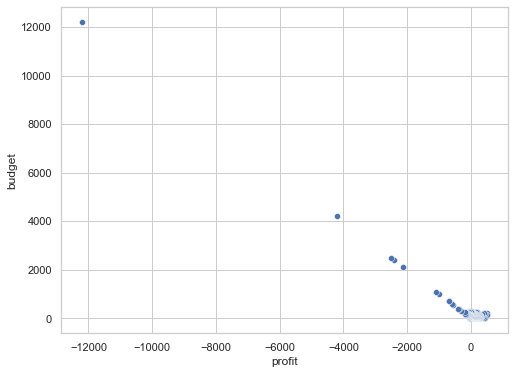

In [16]:
# Lets see the relation between budget and profit
plt.figure(figsize=[8,6])
sns.set(style='whitegrid') 
sns.scatterplot(x="profit",y="budget",data=df)

plt.show()

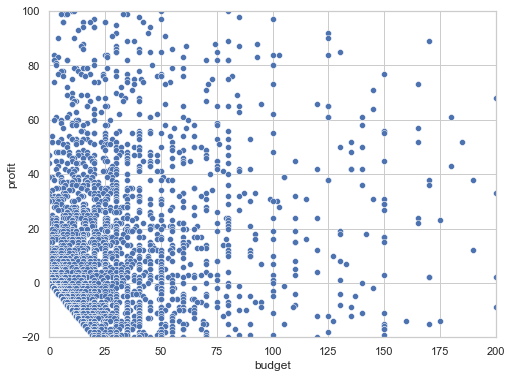

In [17]:
# values seems to be concentrated in the range of 0-20. Lets zoom in to see the relationship
plt.figure(figsize=[8,6])
sns.set(style='whitegrid') 
sns.scatterplot(x="budget",y="profit",data=df)

plt.xlim(0,200)
plt.ylim(-20,100)
plt.show()

# Key Takeaways
* Family+scifi is the combo that people enjoy watching, yielding the most profit
* Most of the movies are making profit. Higher budget movies are profitable (as one assumes) but lower budget movies are also a sucess. However, there are cases where high budget movies are in loss

In [18]:
df_profit_neg=df[df['profit']<0]


In [19]:
neg_profit_movie=df_profit_neg[['movie_title','profit','budget']]
neg_profit_movie

,movie_title,profit,budget
2108,Modern Times,-1.0,1.0
2109,Killing Them Softly,-1.0,15.0
2110,Sea Rex 3D: Journey to a Prehistoric World,-1.0,5.0
2111,Center Stage,-1.0,18.0
2112,Small Time Crooks,-1.0,18.0
...,...,...,...
3852,Steamboy,-2127.0,2127.0
3853,Princess Mononoke,-2398.0,2400.0
3854,Fateless,-2500.0,2500.0
3855,Lady Vengeance,-4200.0,4200.0


Looking at the dataset above we see that Tangled and Spectre have negative profit but we know for a fact that are one of the highest grossing movies. Hence, we can assume that the gross may be domestic or pertaining to a particular region and doesn't take into account the world wide collection

In [20]:
pip install -U seaborn

^C
Note: you may need to restart the kernel to use updated packages.


# Exploring relation between movie ratings with other columns

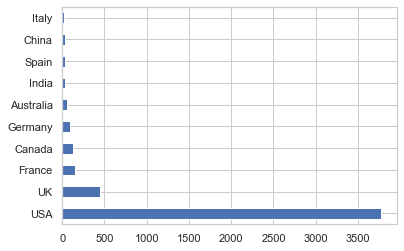

In [21]:
df['country'].value_counts()[:10].plot(kind='barh')

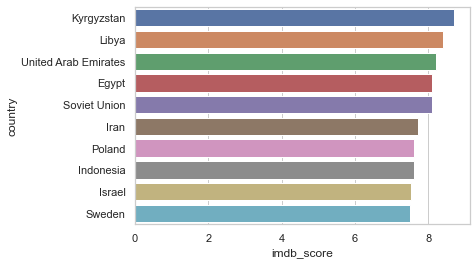

In [47]:
country=df.groupby("country")["imdb_score"].mean().reset_index()
country=country.sort_values('imdb_score',ascending=False)
sns.barplot(x='imdb_score',y='country',data=country[0:10])

* Even though USA has produced the largest amount of movies, its quality is not up to that mark. We can see that the avg rating of USA movies are not even in the top 10 countries with best avg IMDB rating
* Kyrgyzstan movies has the best overall ratings

<Figure size 576x432 with 0 Axes>

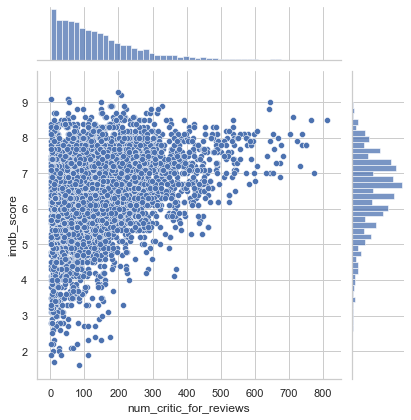

In [49]:
# Lets see the relation between crtic score and rating
plt.figure(figsize=[8,6])
sns.set(style='whitegrid') 
sns.jointplot(x="num_critic_for_reviews",y="imdb_score",data=df)

plt.show()

<Figure size 576x432 with 0 Axes>

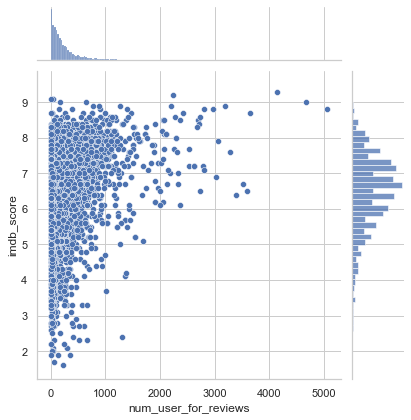

In [50]:
plt.figure(figsize=[8,6])
sns.set(style='whitegrid') 
sns.jointplot(x="num_user_for_reviews",y="imdb_score",data=df)

plt.show()

<Figure size 576x432 with 0 Axes>

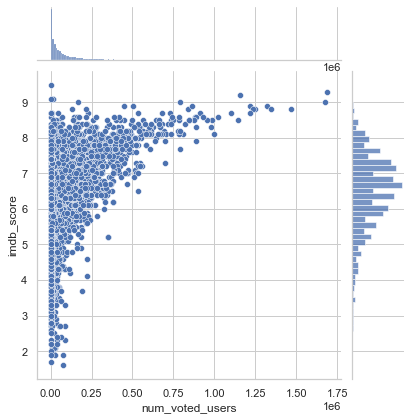

In [51]:
plt.figure(figsize=[8,6])
sns.set(style='whitegrid') 
sns.jointplot(x="num_voted_users",y="imdb_score",data=df)

plt.show()

* number of reviews from critics, number of reviews from users and users who voted for the movies are in high range for high rated movies. Even though there are high rating movies with low values reviews and voting but high voting and review movies have only higher ratings. This meaning that viewers care about the movie ratings.

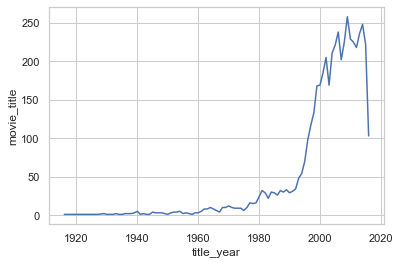

In [107]:
# numbers of movies produced over the years
movie_cnt=df.groupby("title_year")["movie_title"].count().reset_index()
sns.lineplot(x='title_year',y='movie_title',data=movie_cnt)

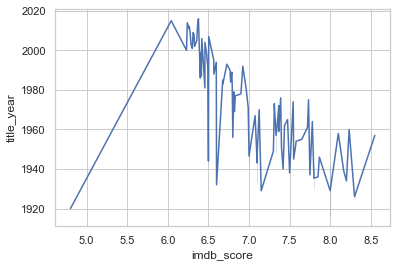

In [65]:
# ratings over the years
year_ratings=df.groupby("title_year")["imdb_score"].mean().reset_index()
sns.lineplot(x='imdb_score',y='title_year',data=year_ratings)

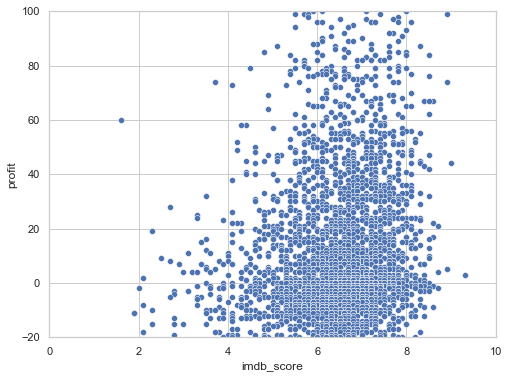

In [71]:
# rating vs profit
plt.figure(figsize=[8,6])
sns.set(style='whitegrid') 
sns.scatterplot(x='imdb_score',y='profit',data=df)

plt.xlim(0,10)
plt.ylim(-20,100)
plt.show()



* over the years the number of movies produced is increaing but the avg rating is shown to be decreasing. Apparently, the content created these days isn't powerful enough
* the profit yeilded by a moive is independent of its rating